In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [16]:
data = pd.read_csv('cdata.csv')
X = data[['x', 'y']].values
K = 4
# randomly select K data points as initial centroids
np.random.seed(42)
initial_centroid_indices = np.random.choice(len(X), K, replace=False)
centroids = X[initial_centroid_indices]


In [6]:
def kmeans(X, K, centroids):
    iterations = 0
    centroid_history = [centroids.copy()]
    while True:
        # assign clusters
        distances = np.sqrt(((X - centroids[:, np.newaxis])**2).sum(axis=2))
        cluster_assignments = np.argmin(distances, axis=0)
        
        # update centroids
        new_centroids = np.array([X[cluster_assignments == k].mean(axis=0) for k in range(K)])
        iterations += 1
        centroid_history.append(new_centroids.copy())
        
        # check for convergence
        if np.allclose(centroids, new_centroids):
            break
        centroids = new_centroids
        
    return cluster_assignments, centroids, centroid_history


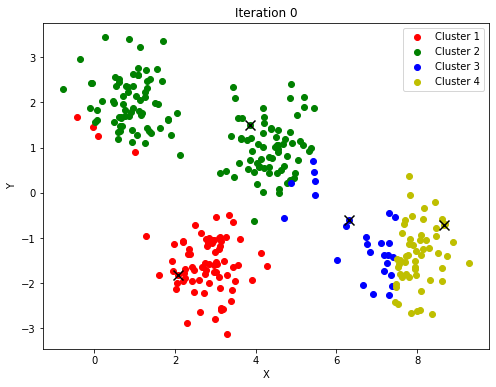

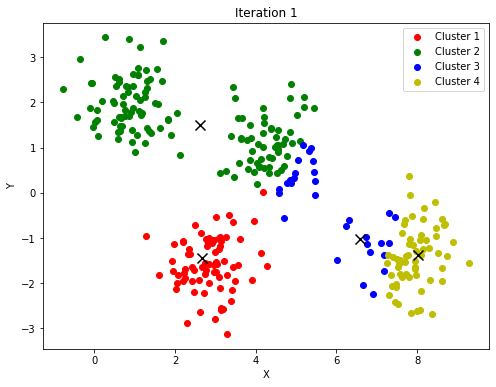

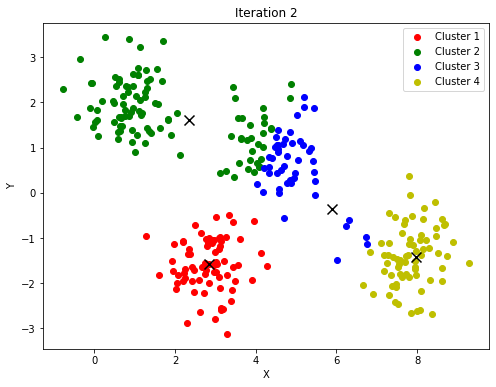

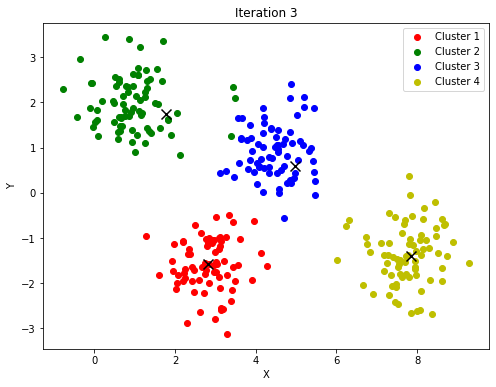

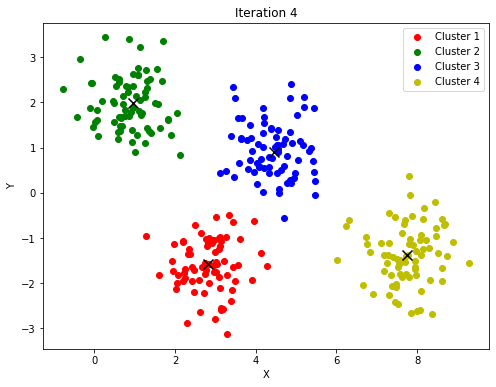

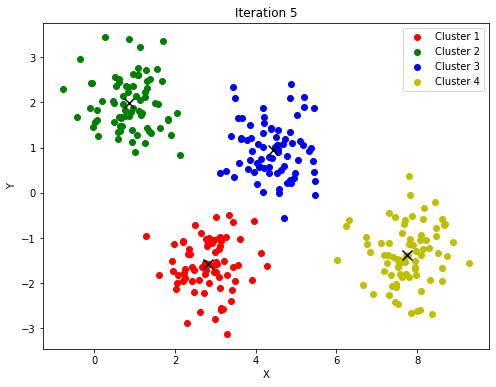

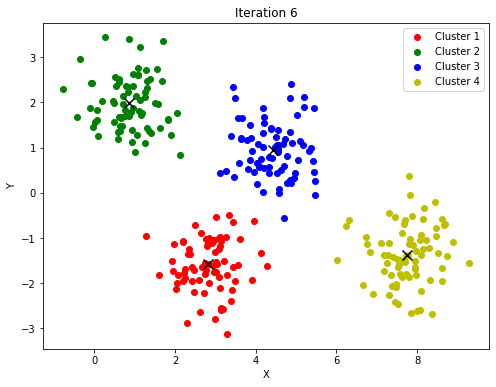

In [8]:
cluster_assignments, final_centroids, centroid_history = kmeans(X, K, centroids)
colors = ['r', 'g', 'b', 'y']
for i, centroids in enumerate(centroid_history):
    plt.figure(figsize=(8, 6))
    distances = np.sqrt(((X - centroids[:, np.newaxis])**2).sum(axis=2))
    cluster_assignments = np.argmin(distances, axis=0)
    for k in range(K):
        cluster_data = X[cluster_assignments == k]
        plt.scatter(cluster_data[:, 0], cluster_data[:, 1], c=colors[k], label=f'Cluster {k+1}')
        plt.scatter(centroids[k, 0], centroids[k, 1], c='k', marker='x', s=100)
    plt.title(f'Iteration {i}')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()
    plt.show()


In [9]:
def calculate_sse(X, centroids, cluster_assignments):
    sse = 0
    for k in range(len(centroids)):
        cluster_data = X[cluster_assignments == k]
        sse += ((cluster_data - centroids[k])**2).sum()
    return sse


In [15]:
K_values = range(2, 11)
sse_values = []

for K in K_values:
    # randomly initialize centroids
    initial_centroid_indices = np.random.choice(len(X), K, replace=False)
    centroids = X[initial_centroid_indices]
    cluster_assignments, final_centroids, _ = kmeans(X, K, centroids)
    # Calculate SSE
    sse = calculate_sse(X, final_centroids, cluster_assignments)
    sse_values.append(sse)
sse_values

[1190.7810063914321,
 546.8913452710292,
 212.00641145466665,
 194.90927567072671,
 183.5943445589496,
 153.21886772839437,
 154.37242338624264,
 158.18159723356018,
 129.41699488267454]

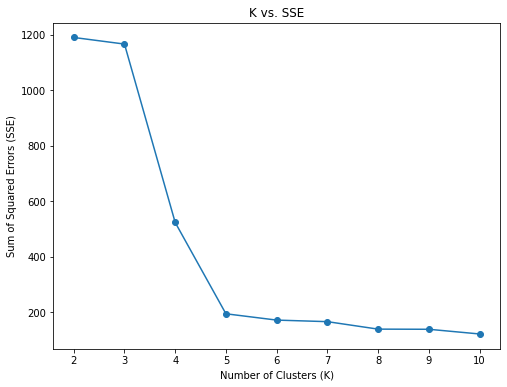

In [11]:
plt.figure(figsize=(8, 6))
plt.plot(K_values, sse_values, marker='o')
plt.title('K vs. SSE')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.xticks(K_values)
plt.show()


In [23]:
num_runs = 10
K = 4
sse_runs = []

for run in range(num_runs):
    # randomly initialize centroids
    initial_centroid_indices = np.random.choice(len(X), K, replace=False)
    centroids = X[initial_centroid_indices]
    cluster_assignments, final_centroids, _ = kmeans(X, K, centroids)
    # calculate SSE
    sse = calculate_sse(X, final_centroids, cluster_assignments)
    sse_runs.append(sse)
sse_runs

[212.00641145466665,
 212.00641145466665,
 212.00641145466665,
 523.7152817868877,
 212.00641145466665,
 212.00641145466665,
 523.7152817868875,
 212.00641145466665,
 212.00641145466665,
 212.00641145466665]

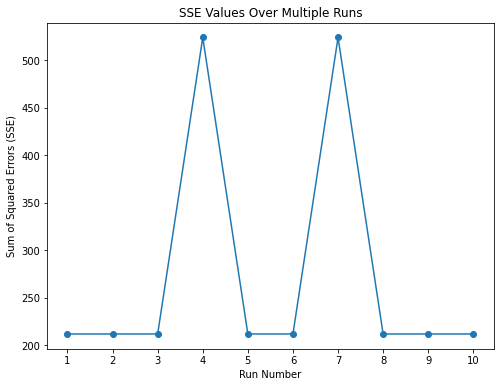

In [24]:
plt.figure(figsize=(8, 6))
plt.bar(range(1, num_runs + 1), sse_runs)
plt.title('SSE Values Over Multiple Runs')
plt.xlabel('Run Number')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.xticks(range(1, num_runs + 1))
plt.show()
